In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import ztest

## 1) Исходные данные

###Создадим две выборки:X1 ~ R(5, 15) и X2 ~ N(10, 5)

In [4]:
np.random.seed(42)

#Равномерное
a = 5
b = 15
n1 = 300
X1 = np.random.uniform(a, b, size = n1)

#Нормальное
m = 10
std = 5
n2 = 100
X2 = np.random.randn(n2)*std + m

In [5]:
st.describe(X1), st.describe(X2)

(DescribeResult(nobs=300, minmax=(5.050615838462187, 14.900538501042632), mean=9.952045990934922, variance=8.663635318431458, skewness=0.0013187064087496695, kurtosis=-1.2703573323541548),
 DescribeResult(nobs=100, minmax=(-6.206336700345364, 20.719720446626628), mean=10.349138877191153, variance=24.07272037352687, skewness=-0.23159284247234213, kurtosis=0.39081972160764433))

In [6]:
#Характеристики случайных величин
m01 = 10
m02 = 10

std1 = (((15-5)**2)/12)**(1/2)
std2 = 5

#Выборочные характеристики
m1 = np.mean(X1)
m2 = np.mean(X2)

s1 = np.var(X1, ddof=1)**(1/2)
s2 = np.var(X2, ddof=1)**(1/2)

S01 = (np.sum((X1 - m01)**2)/n1)**(1/2)
S02 = (np.sum((X2 - m02)**2)/n2)**(1/2)

d1 = s1**2
d2 = s2**2
(m1, s1, d1), (m2, s2, d2)

((9.952045990934922, 2.9434053948498935, 8.663635318431458),
 (10.349138877191153, 4.906395863923626, 24.072720373526863))

In [7]:
#pooled
X_poled = np.hstack([X1, X2])

np.mean(X_poled), np.var(X_poled, ddof=1)**(1/2), np.var(X_poled, ddof=1)

(10.05131921249898, 3.5348081109854115, 12.494868381488255)

In [8]:
a = 0.05

## 2) Однопараметрические критерии

In [10]:
print('z-test:', 'Z={}, p={}'.format(*ztest(X1, value=m01)))
# H0 принимаем

print('t-test:', 'T={}, p={}'.format(*st.ttest_1samp(X1, m01)))
# H0 принимаем

Z = n1*(S01**2)/(std1**2)
p = 2*min(st.distributions.chi2(n1).cdf(Z), (1 - st.distributions.chi2(n1).cdf(Z)))
print('X^2 test(m01 известно):', 'Z =', Z, 'p-value =', p)
# H0 принимаем

Z = (n1-1)*(S01**2)/(std1**2)
p = 2*min(st.distributions.chi2(n1-1).cdf(Z), (1 - st.distributions.chi2(n1-1).cdf(Z)))
print('X^2 test(m01 неизвестно):''Z =', Z, 'p-value =', p)
# H0 принимаем

z-test: Z=-0.28218600221587864, p=0.7778008909783632
t-test: T=-0.28218600221587864, p=0.777996115341626
X^2 test(m01 известно): Z = 310.9340203567955 p-value = 0.6396357331056859
X^2 test(m01 неизвестно):Z = 309.8975736222729 p-value = 0.6401294617344706


##3) Двухвыборочные критерии

Допустим, мы не знаем, что дисперсии генеральных совокупностей не равны.
Тогда проведем сначала 2-sample F-test при неизвестных мат. ожиданиях.

In [13]:
Z = (s2**2)/(s1**2)
p = 2*min(st.distributions.f(n2 - 1, n1 - 1).cdf(Z), 1 - st.distributions.f(n2 - 1, n1 - 1).cdf(Z))
print('2-sample F-test (m – не изв):','Z =', Z, 'p-value =', p)
# H0 отклоняем

Z = (S02**2)/(S01**2)
p = 2*min(st.distributions.f(n2 - 1, n1 - 1).cdf(Z), 1 - st.distributions.f(n2 - 1, n1 - 1).cdf(Z))
print('2-sample F-test (m – изв):','Z =', Z, 'p-value =', p)
# H0 отклоняем

2-sample F-test (m – не изв): Z = 2.778593452833054 p-value = 2.116862241052786e-11
2-sample F-test (m – изв): Z = 2.7733860692482355 p-value = 2.311306701585636e-11


Оснований считать, что дисперсии генеральных совокупностей равны, нет. Применим t-критерий Уэлча.

In [14]:
def n(x1, x2):
    s1 = np.var(x1, ddof=1)**(1/2)
    s2 = np.var(x2, ddof=1)**(1/2)

    n1 = len(x1)
    n2 = len(x2)

    a = ((s1**2) / n1 + (s2**2)/n2)
    b = ( (((s1**2) / n1) / a )**2 ) / (n1 - 1) + ( (((s2**2)/n2) / a )**2 ) / (n2 - 1)
    return int(1/b)

In [16]:
Z = (m1 - m2)/(( (s1**2)/n1 + (s2**2)/n2 )**(1/2))

# Число степеней свободы для распределния Стьюдента
print('n =', n(X1, X2))

p = 2*min(st.distributions.t(n(X1, X2)).cdf(Z), 1 - st.distributions.t(n(X1, X2)).cdf(Z))
print('2-sample t-test:', 'Z =', Z, 'p-value =', p)
# H0 принимаем

n = 123
2-sample t-test: Z = -0.7647638307978208 p-value = 0.4458769714807149


In [17]:
##С помощью st.ttest_ind
st.ttest_ind(X1, X2, equal_var=False)

TtestResult(statistic=-0.7647638307978208, pvalue=0.4458700036508685, df=123.58887560260101)

## 4) Исследование распределений статистик критерия

In [23]:
def stat(n_s):
    np.random.seed(100)
    n_sample = n_s
    p = []
    z = []
    n_free = [] #Число степеней свободы для каждой выборки
    #Равномерное
    a = 5
    b = 15
    n1 = 300

    #Нормальное
    m = 10
    std = 5
    n2 = 100
    for i in range(n_sample):

        X1 = np.random.uniform(a, b, size = n1)
        X2 = np.random.randn(n2)*std + m

        s1 = np.var(X1, ddof=1)**(1/2)
        s2 = np.var(X2, ddof=1)**(1/2)

        m1 = np.mean(X1)
        m2 = np.mean(X2)

        Z = (m1 - m2)/(( (s1**2)/n1 + (s2**2)/n2 )**(1/2))
        z.append(Z)
        p.append(2*min(st.distributions.t(n(X1, X2)).cdf(Z),1 - st.distributions.t(n(X1, X2)).cdf(Z)))
        n_free.append(n(X1, X2))
    return (z, p, n_free)

In [24]:
z_stat, p_stat, n_free = stat(1000)
print('Выборочные характеристики для Z:', np.mean(z_stat), np.var(z_stat, ddof=1), np.var(z_stat, ddof=1)**(1/2))
print('Выборочные характеристики для p:', np.mean(p_stat), np.var(p_stat, ddof=1), np.var(p_stat, ddof=1)**(1/2))

Выборочные характеристики для Z: -0.022867288875159365 0.9832956872336917 0.9916126699642818
Выборочные характеристики для p: 0.5028338138891664 0.08035520126975815 0.2834699300979879


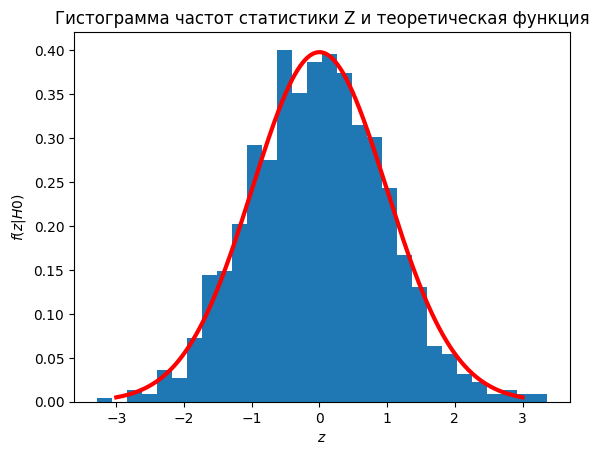

In [25]:
x = np.linspace(-3, 3, 1000)
df = int(np.mean(n_free))
pdf_1 = st.t.pdf(x, df=df)
plt.plot(x, pdf_1, c='r', lw=3)
plt.hist(z_stat, bins=30, density=True)
plt.title('Гистограмма частот статистики Z и теоретическая функция')
plt.ylabel('$f(z|H0)$')
plt.xlabel('$z$');

Text(0.5, 0, '$p$')

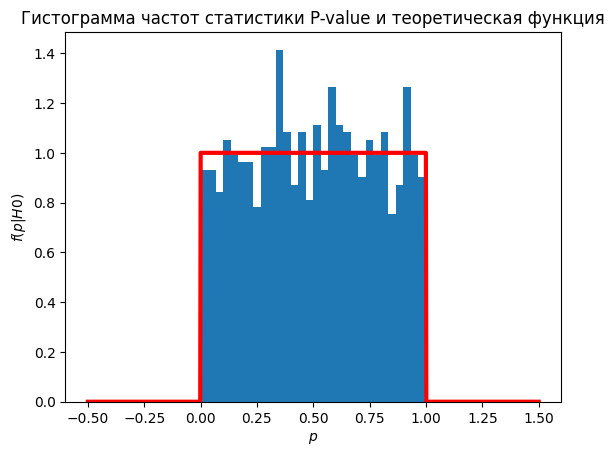

In [26]:
x = np.linspace(-0.5, 1.5, 1000)
pdf_1 = st.uniform.pdf(x, 0, 1)
plt.plot(x, pdf_1, c='r', lw=3)
plt.hist(p_stat, bins=30, density=True)
plt.title('Гистограмма частот статистики P-value и теоретическая функция')
plt.ylabel('$f(p|H0)$')
plt.xlabel('$p$')